In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
nba_train = pd.read_csv('D:/DS/analytics_edge/2. Linear Regression/NBA_train.csv')
nba_test = pd.read_csv('D:/DS/analytics_edge/2. Linear Regression/NBA_test.csv')

In [8]:
pandas_profiling.ProfileReport(nba_train)

Number of variables,20
Number of observations,835
Total Missing (%),0.0%
Total size in memory,130.5 KiB
Average record size in memory,160.1 B
Numeric,13
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,5


In [6]:
nba_train.sample(5)

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
410,1996,New York Knicks,1,47,7971,7781,3003,6382,2518,5097,485,1285,1480,1954,829,2449,1822,645,377,1272
435,1997,Miami Heat,1,61,7776,7326,2822,6235,2144,4370,678,1865,1454,2022,957,2402,1735,650,439,1306
535,2001,Utah Jazz,1,53,7959,7574,2960,6289,2635,5437,325,852,1714,2280,943,2383,2110,661,463,1296
614,2004,New York Knicks,1,39,7542,7663,2881,6513,2475,5398,406,1115,1374,1732,950,2543,1695,608,391,1289
253,1990,Sacramento Kings,0,23,8341,8756,3305,7056,3089,6407,216,649,1515,1964,952,2363,2052,546,392,1239


Playoffs: Binary variable - Whether or not the team qualified for the playoffs

W: Wins

PTS: POints

oppPTS: Opposition Points

FG: Field Goals

FGA: Field Goals Attempted

2P: 2 Pointers

3P: 3 Pointers

FT: Free Throws

ORB: Offensive Rebound

DRB: Defensive Rebound

AST: Assists

STL: Steals

BLK: BLocks

TOV: Turnovers

In [18]:
nba_train.groupby(['W', 'Playoffs']).size()

W   Playoffs
11  0            2
12  0            2
13  0            2
14  0            2
15  0           10
16  0            2
17  0           11
18  0            5
19  0           10
20  0           10
21  0           12
22  0           11
23  0           11
24  0           18
25  0           11
26  0           17
27  0           10
28  0           18
29  0           12
30  0           19
    1            1
31  0           15
    1            1
32  0           12
33  0           17
34  0           16
35  0           13
    1            3
36  0           17
    1            4
                ..
44  0            2
    1           27
45  0            3
    1           22
46  0            1
    1           15
47  1           28
48  0            1
    1           14
49  1           17
50  1           32
51  1           12
52  1           20
53  1           17
54  1           18
55  1           24
56  1           16
57  1           23
58  1           13
59  1           14
60  1            8

In [21]:
nba_train['points_diff'] = nba_train['PTS'] - nba_train['oppPTS']

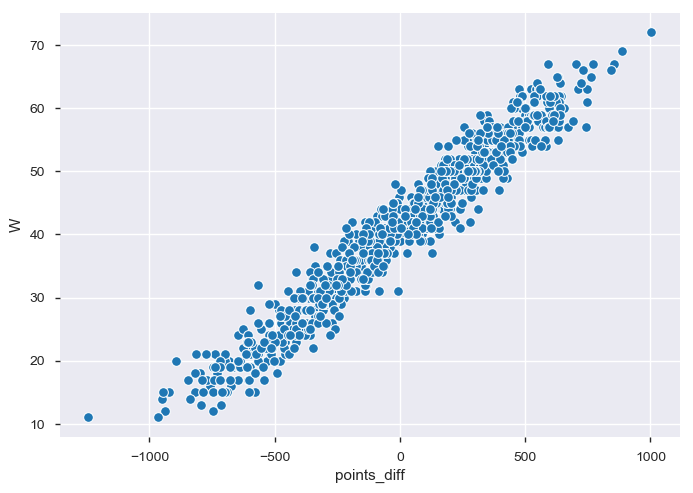

In [22]:
sns.scatterplot(nba_train.points_diff, nba_train.W)

Strong Collinearity.

Therefore, 

points_diff -> Independant Variable

W -> Dependant Variable



In [26]:
lm = smf.ols(formula = 'W ~ points_diff', data = nba_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.361e+04
Date:                Thu, 27 Jun 2019   Prob (F-statistic):               0.00
Time:                        01:51:45   Log-Likelihood:                -2118.0
No. Observations:                 835   AIC:                             4240.
Df Residuals:                     833   BIC:                             4249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      41.0000      0.106    387.027      0.000      40.792      41.208
points_diff     0.0326      0.000    116.681      0.000       0.032       0.033
==============================================================================
Omnibus:                        0.985   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.946
Skew:                           0.082   Prob(JB):                        0.623
Kurtosis:                       3.006   Cond. No.                         379.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""